In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in the dataset
file_path = 'PS_2025.04.01_18.21.30.csv'

exoplanets = pd.read_csv(file_path, sep=',', header=0)

In [3]:
# Displaying the information about the dataset to see what are integers, floats, strings, etc.
exoplanets.info()
exoplanets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38182 entries, 0 to 38181
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38182 non-null  object 
 1   hostname         38182 non-null  object 
 2   default_flag     38182 non-null  int64  
 3   sy_snum          38182 non-null  int64  
 4   sy_pnum          38182 non-null  int64  
 5   discoverymethod  38182 non-null  object 
 6   pl_orbper        34995 non-null  float64
 7   pl_orbsmax       21601 non-null  float64
 8   pl_rade          26470 non-null  float64
 9   pl_radj          26470 non-null  float64
 10  pl_bmasse        6404 non-null   float64
 11  pl_bmassj        6403 non-null   float64
 12  pl_bmassprov     6404 non-null   object 
 13  pl_orbeccen      18429 non-null  float64
 14  pl_eqt           16739 non-null  float64
 15  st_teff          35179 non-null  float64
 16  st_rad           35227 non-null  float64
 17  st_mass     

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass
0,11 Com b,11 Com,0,2,1,Radial Velocity,NaN,1.210,NaN,NaN,5434.700000,17.100,Msini,NaN,NaN,NaN,NaN,2.60
1,11 Com b,11 Com,0,2,1,Radial Velocity,326.03000,1.290,NaN,NaN,6165.600000,19.400,Msini,0.231,NaN,4742.0,19.00,2.70
2,11 Com b,11 Com,1,2,1,Radial Velocity,323.21000,1.178,NaN,NaN,4914.898486,15.464,Msini,0.238,NaN,4874.0,13.76,2.09
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,516.21997,1.530,NaN,NaN,4684.814200,14.740,Msini,0.080,NaN,4213.0,29.79,2.78
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,NaN,1.510,NaN,NaN,3432.400000,10.800,Msini,NaN,NaN,NaN,NaN,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38177,ups And d,ups And,0,2,3,Radial Velocity,1319.00000,2.570,NaN,NaN,1255.380000,3.950,Msini,0.269,NaN,NaN,NaN,NaN
38178,ups Leo b,ups Leo,1,1,1,Radial Velocity,385.20000,1.180,NaN,NaN,162.092488,0.510,Msini,0.320,NaN,4836.0,11.22,1.48
38179,xi Aql b,xi Aql,0,1,1,Radial Velocity,NaN,0.580,NaN,NaN,642.000000,2.020,Msini,NaN,NaN,NaN,NaN,1.40
38180,xi Aql b,xi Aql,0,1,1,Radial Velocity,136.75000,0.680,NaN,NaN,890.000000,2.800,Msini,0.000,NaN,4780.0,12.00,2.20


In [4]:
# Checking to see if there are any missing values in the dataset
nan_df = exoplanets.isnull().sum() * 100 / (exoplanets.count() + exoplanets.isnull().sum())
nan_df

pl_name             0.000000
hostname            0.000000
default_flag        0.000000
sy_snum             0.000000
sy_pnum             0.000000
discoverymethod     0.000000
pl_orbper           8.346865
pl_orbsmax         43.426222
pl_rade            30.674140
pl_radj            30.674140
pl_bmasse          83.227699
pl_bmassj          83.230318
pl_bmassprov       83.227699
pl_orbeccen        51.733801
pl_eqt             56.159971
st_teff             7.864963
st_rad              7.739249
st_mass            15.151118
dtype: float64

Quite a lot of missing values! Let's remove mass due to how many missing values there are.

In [5]:
df = exoplanets.drop(columns=['pl_bmasse', 'pl_bmassj', 'pl_bmassprov'], axis=1).copy()
df = df.dropna(subset=['pl_rade', 'pl_eqt']).copy()


In [ ]:
# Checking just to be sure that the columns were dropped and to see what the missing values look like now
nan_df_new = df.isnull().sum() * 100 / (df.count() + df.isnull().sum())
nan_df_new

pl_name             0.000000
hostname            0.000000
default_flag        0.000000
sy_snum             0.000000
sy_pnum             0.000000
discoverymethod     0.000000
pl_orbper           0.284952
pl_orbsmax          7.790712
pl_rade             0.000000
pl_radj             0.000000
pl_orbeccen        12.161998
pl_eqt              0.000000
st_teff             0.381957
st_rad              0.297078
st_mass             7.208682
dtype: float64

In [9]:
# Very important classiification function to classify the habitability of the exoplanets based on their radius and equilibrium temperature.
def classify_habitability(row):
    radius = row['pl_rade']     # in Earth radii
    eq_temp = row['pl_eqt']     # in Kelvin

    if radius >= 8:  # Very large, highly likely a Jupiter-class gas giant
        if eq_temp > 500:
            return 'Hot Jupiters' # Close to stars, high temperatures
        else:
            return 'Cold Jupiters' # Far(ther) from stars, low temperatures.
    elif radius < 2.5:  # Terrestrial size range
        if 180 <= eq_temp <= 310: # Habitable range for terrestrial planets, almost Earth-like
            return 'Habitable Terrestrial'
        elif 100 <= eq_temp < 180 or 310 < eq_temp <= 400: # Somewhat habitable range for terrestrial planets, but not completely Earth-like
            return 'Semi-Habitable Terrestrial'
        else:
            return 'Not-Habitable Terrestrial' # Everything else is not habitable, but still terrestrial.
    else:
        # Between 2.5 and 8 Earth radii — likely sub-Neptune or Neptune-class,
        # but we will classify them as not habitable terrestrial
        # which is still possible to be this large for terrestrial planets.
        # Could be a useful classification for future research.
        return 'Not-Habitable Terrestrial'

In [10]:
# Applying the classification function to the DataFrame
df['habitability_class'] = df.apply(classify_habitability, axis=1)
df['habitability_class'].value_counts()

habitability_class
Not-Habitable Terrestrial     13616
Hot Jupiters                   1942
Semi-Habitable Terrestrial      462
Habitable Terrestrial           286
Cold Jupiters                   188
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.inspection import permutation_importance


In [12]:
# Dropping the columns that are not needed for the classification task.
df.drop(columns=['pl_name', 'hostname', 'default_flag', 'sy_pnum'])

,sy_snum,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass,habitability_class
30,1,Imaging,NaN,330.00000,18.647000,1.664000,NaN,1800.00,4060.00,1.352000,0.850000,Hot Jupiters
37,1,Imaging,NaN,NaN,11.209000,1.000000,NaN,1600.00,3309.00,0.366450,0.353185,Hot Jupiters
113,2,Radial Velocity,0.736546,NaN,2.023112,0.180490,NaN,1831.27,5250.00,0.963515,NaN,Not-Habitable Terrestrial
114,2,Radial Velocity,0.736544,0.01544,2.080000,0.185565,0.061,1958.00,5234.00,0.943000,0.905000,Not-Habitable Terrestrial
167,1,Transit,8.463000,0.06450,4.070000,0.363102,0.000,593.00,3700.00,0.750000,0.500000,Not-Habitable Terrestrial
...,...,...,...,...,...,...,...,...,...,...,...,...
38065,1,Imaging,NaN,8.90000,16.800000,1.500000,NaN,1650.00,8038.68,1.544160,1.950000,Hot Jupiters
38066,1,Imaging,NaN,NaN,18.494850,1.650000,NaN,1612.00,NaN,NaN,NaN,Hot Jupiters
38131,1,Transit,6.268340,0.06702,2.060000,0.183781,0.000,1147.00,5870.00,1.100000,1.020000,Not-Habitable Terrestrial
38132,1,Transit,6.267900,0.06839,2.042000,0.182175,0.000,1169.80,6037.00,1.100000,1.094000,Not-Habitable Terrestrial


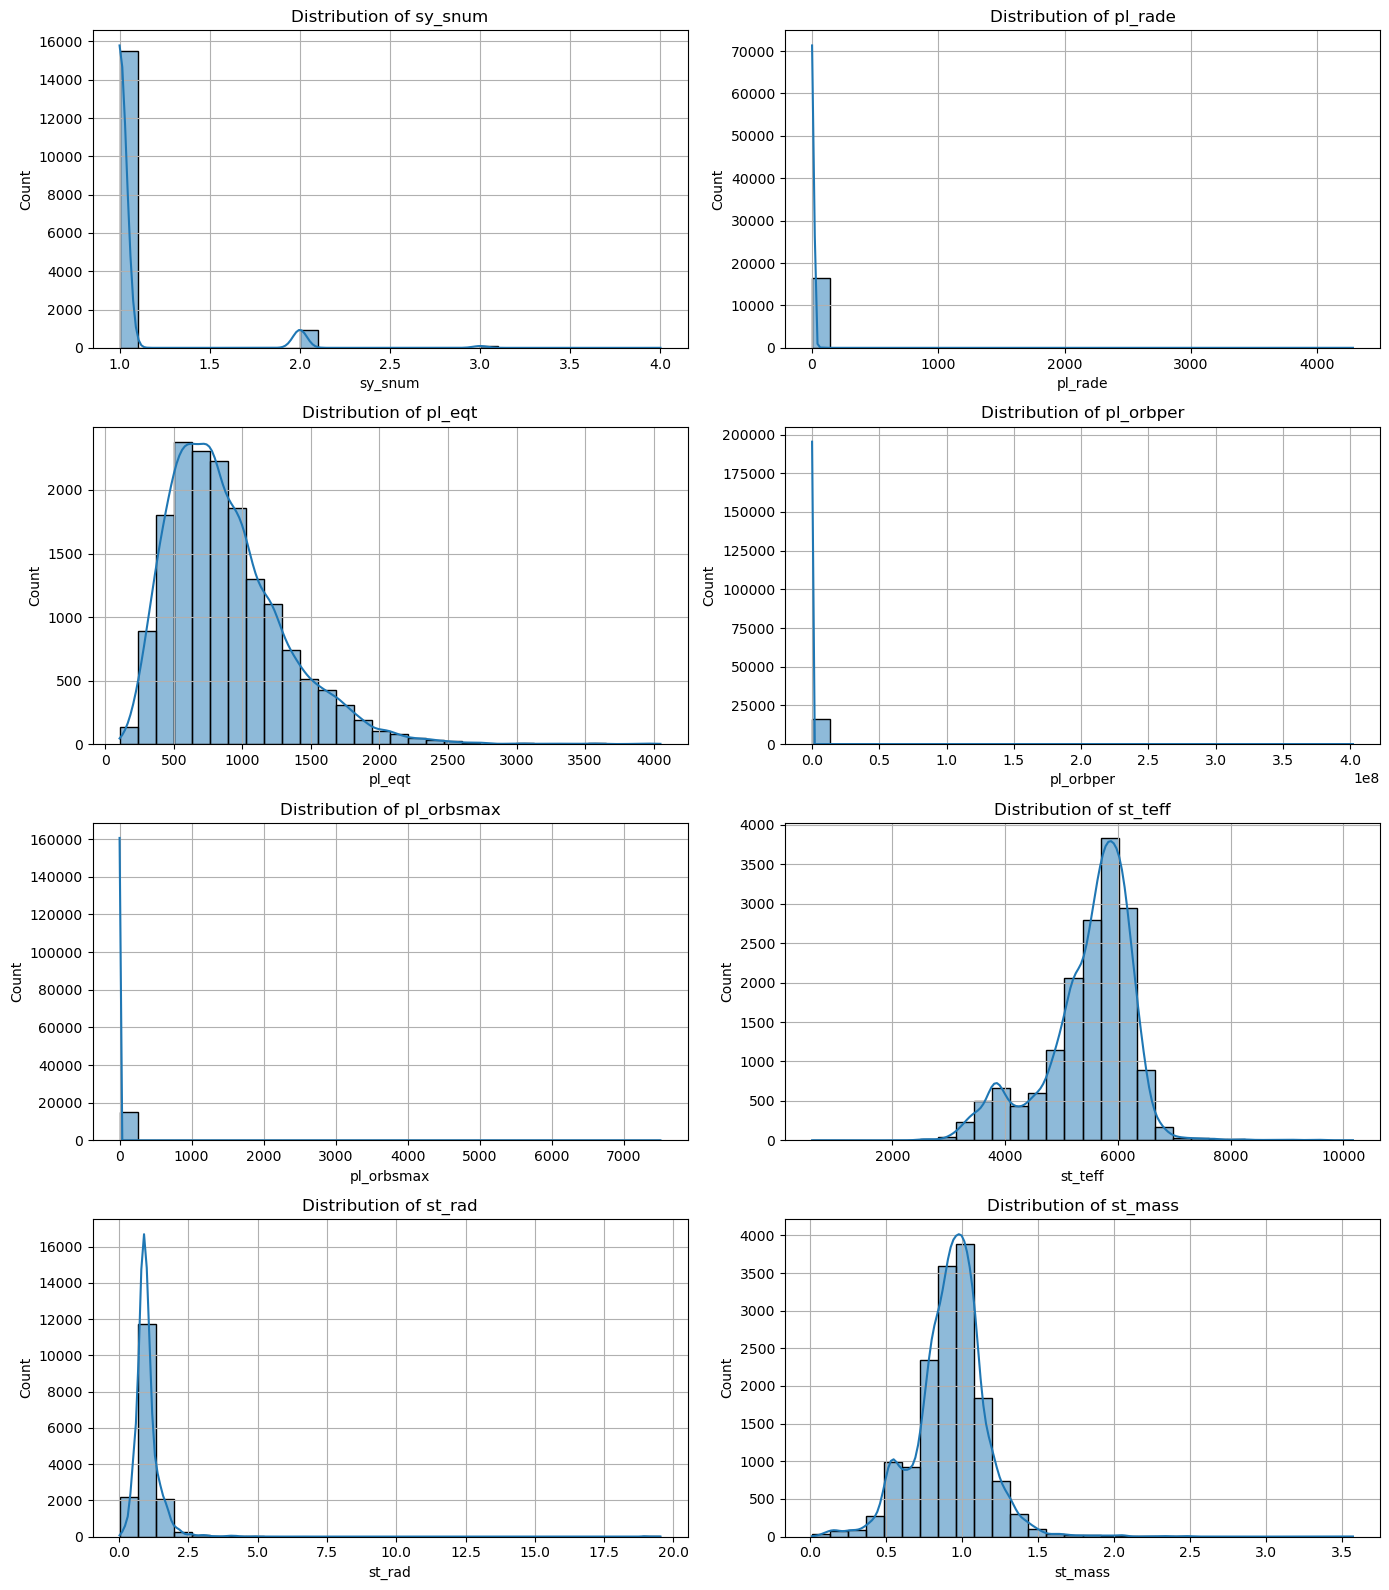

In [21]:
# Here I am using the seaborn library to plot the distributions of the features,
# creates easy to read histograms with a distribution curve on top of it.
# This is a very useful way to visualize the data and see how the features are distributed.
import seaborn as sns


features = ['sy_snum', 'pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']

# Creating a subplot to contain all the histograms
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten() # Flatten the 2D array of axes to 1D 

# Plotting the histograms for each feature
for i, feature in enumerate(features):  # Iterate through all 8 features

    # Below I am using sns.histplot to easily create the histograms with a distribution curve on top of it, specifically by saying kde=True.
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Let's get rid of the absurd values in the rade and pl_orb areas, limiting them to the following conditions below

In [19]:
# Defining my filtering conditions based on the above histograms.
# I choose these values based on the distributions of the features, so that the outliers are removed and the data is not skewed heavily in one direction.
condition = (
    (df['pl_rade'] <= 150) &
    (df['pl_orbper'] <= 3000) &
    (df['pl_orbsmax'] <= 300)
)

# Apply the filter
df_cleaned = df[condition].copy()

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_cleaned)}")

Original rows: 16494
Filtered rows: 15163


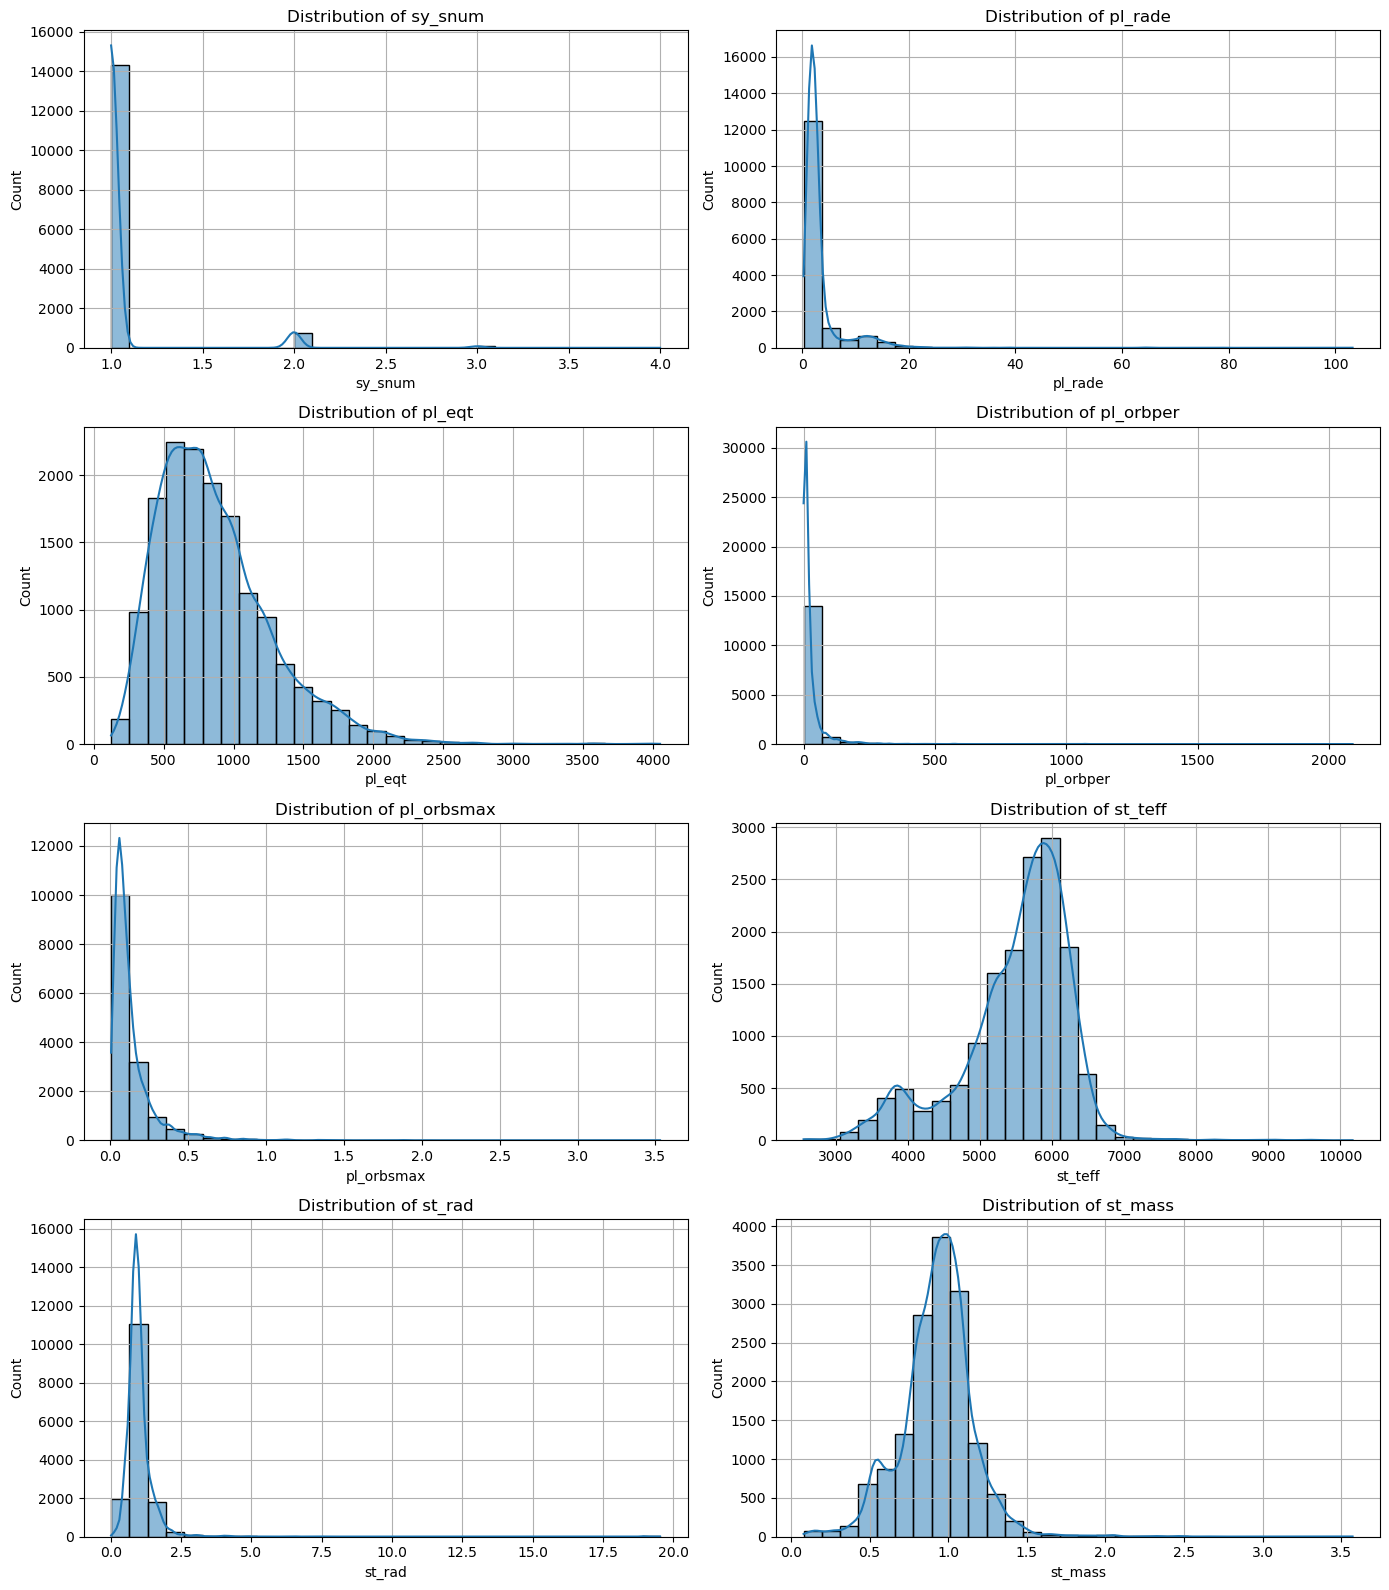

In [22]:

# Using the same graphing method as above...
fig, axes = plt.subplots(4, 2, figsize=(14, 16)) 
axes = axes.flatten() 

for i, feature in enumerate(features): 
    sns.histplot(df_cleaned[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

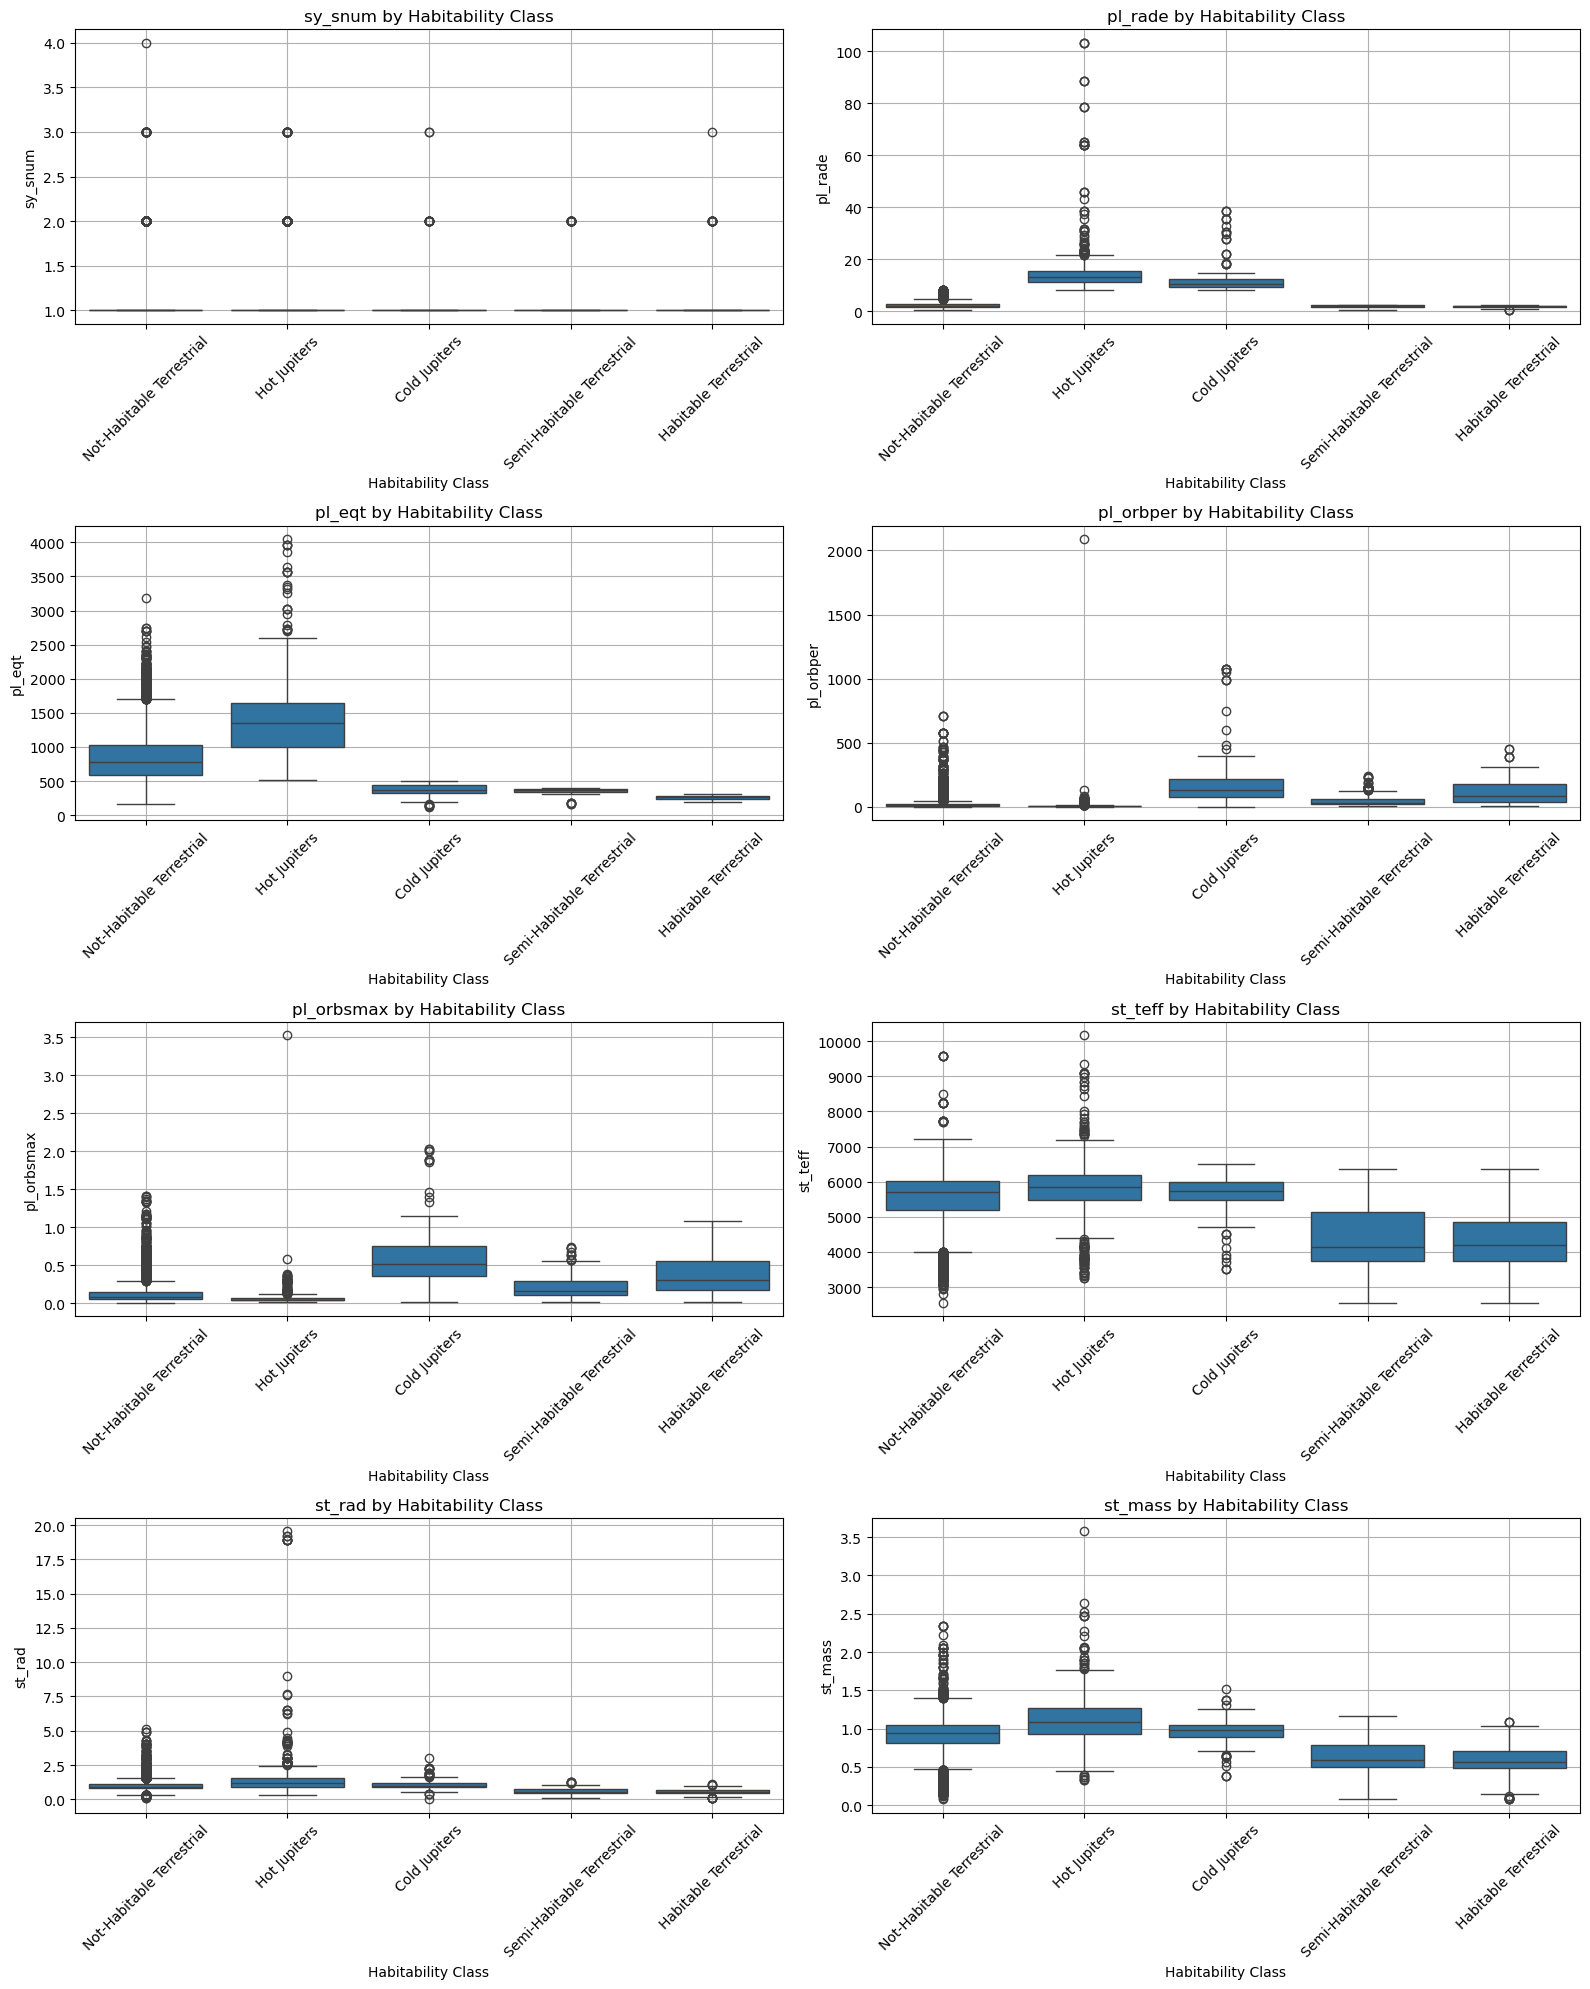

In [23]:
# Now I am using the seaborn library, as it does this job very easily, to plot the boxplots of the features against the habitability class.
# This is useful to see how the features are distributed across the different habitability classes.
fig, axes = plt.subplots(4, 2, figsize=(16, 20)) 
axes = axes.flatten() 

for i, feature in enumerate(features): 
    sns.boxplot(data=df_cleaned, x='habitability_class', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Habitability Class')
    axes[i].set_xlabel('Habitability Class')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)


plt.tight_layout()
plt.show()


In [ ]:
# Creating a cleaned DataFrame with only the features and the target variable to be used for all models.
df_cleaned.to_csv('exoplanets_cleaned.csv', index=False)

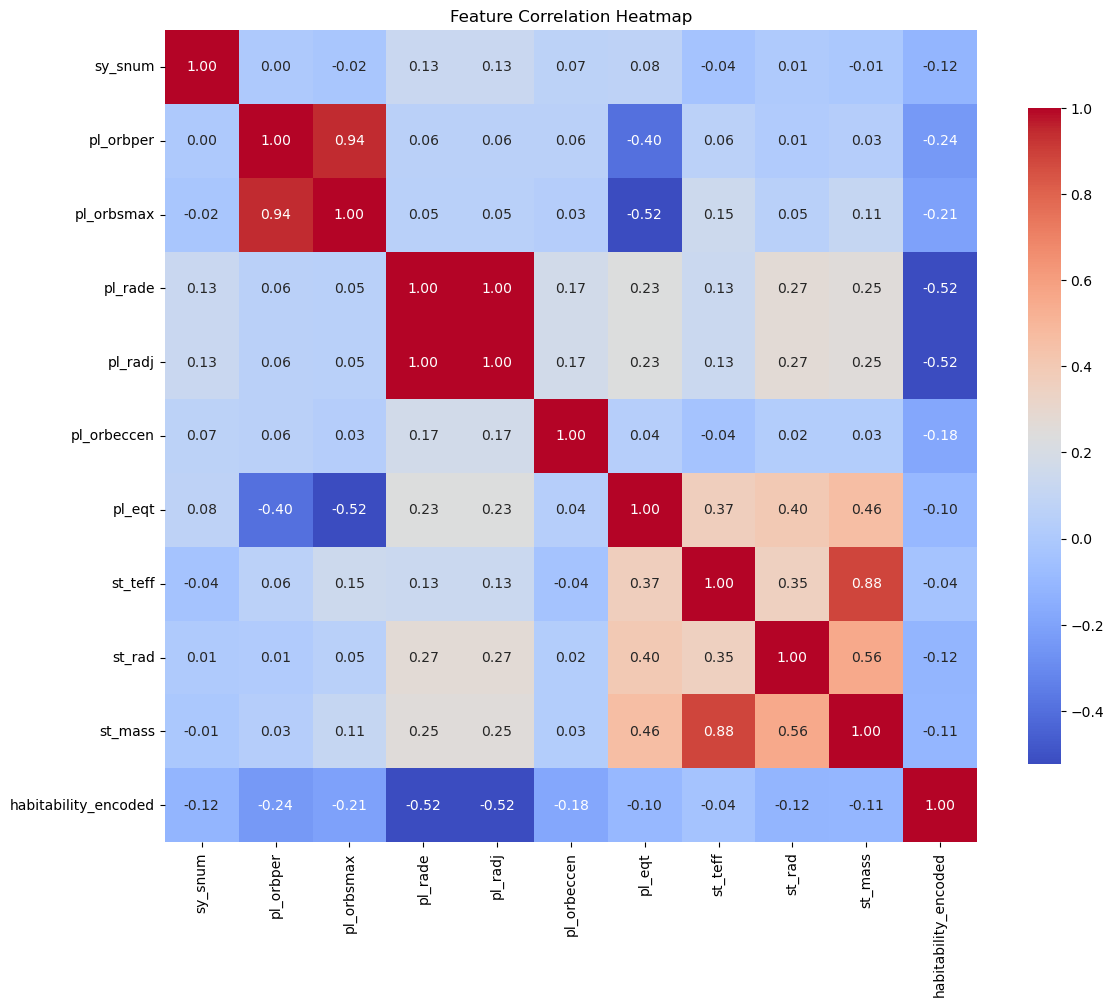

In [ ]:
# Now that we have the cleaned DataFrame, let's create a heatmap!

# Need to label encode the habitability class for the heatmap
label_encoder = LabelEncoder()
df["habitability_encoded"] = label_encoder.fit_transform(df["habitability_class"])

# Selecting just the numeric columns (although all of them are numeric)
numeric_df = df.select_dtypes(include='number')

# Dropping the columns that are not needed for the heatmap
numeric_df = numeric_df.drop(columns=['default_flag', 'sy_pnum'])


# Create the heatmap!
corr_matrix = numeric_df.corr()

# Plot the heatmap, annotating the labels for better readability, choosing 2 decimal places for the values, and using a color map and bar for easy reading
# Also using the snsns library to create the heatmap because it is easy to use and is easily readable
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

Time to begin the encoding and model making! Starting with LabelEncoder

In [ ]:
# Simply encoding the habitability class to be used for the classification task.
label_encoder = LabelEncoder()
df = df_cleaned.copy()
df['habitability_encoded'] = label_encoder.fit_transform(df['habitability_class'])


# Splitting the data into features and target variable
X = df[['sy_snum', 'pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']].copy()
y = df['habitability_encoded']


In [25]:
X

,sy_snum,pl_rade,pl_eqt,pl_orbper,pl_orbsmax,st_teff,st_rad,st_mass
114,2,2.080000,1958.0,0.736544,0.01544,5234.0,0.943,0.905
167,1,4.070000,593.0,8.463000,0.06450,3700.0,0.750,0.500
170,1,3.956770,600.0,8.463080,0.06490,3678.0,0.744,0.510
175,1,3.240000,454.0,18.859019,0.11010,3700.0,0.750,0.500
179,1,2.522021,459.0,18.859690,0.11080,3678.0,0.744,0.510
...,...,...,...,...,...,...,...,...
38030,1,12.206601,1203.0,4.187757,0.04940,5370.0,1.065,0.914
38035,1,23.202630,1577.0,3.765001,0.08150,6720.0,1.930,1.470
38042,1,15.389957,1743.0,2.864142,0.04421,6250.0,1.480,1.405
38131,1,2.060000,1147.0,6.268340,0.06702,5870.0,1.100,1.020


In [26]:
# Checking again for any missing values in the features DataFrame
nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

sy_snum       0.000000
pl_rade       0.000000
pl_eqt        0.000000
pl_orbper     0.000000
pl_orbsmax    0.000000
st_teff       0.296775
st_rad        0.230825
st_mass       0.250610
dtype: float64

In [27]:
# Imputing the missing values with the median of each column, as it is better to use the median for data that is skewed.
for column in X.columns:
    median = X[column].median()
    X[column] = X[column].fillna(median)

In [28]:
# Checking again just to make sure that the missing values are gone...
nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

sy_snum       0.0
pl_rade       0.0
pl_eqt        0.0
pl_orbper     0.0
pl_orbsmax    0.0
st_teff       0.0
st_rad        0.0
st_mass       0.0
dtype: float64

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [30]:
# Scaling the features using StandardScaler to make sure that all features are on the same scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Importantly applying SMOTE to balance the classes in the training set, this will help the model to learn better and not be biased towards the majority class.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


c:\Users\dam10\OneDrive\Documents\GitHub\DS-3001\.conda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
# Applying a basic KNN classifier to the data, using 5 neighbors.
# This is a simple model to start with, and it is easy to understand and interpret.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)
y_pred = knn.predict(X_test_scaled)

# Printing the classification report to see how well the model performed.
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                            precision    recall  f1-score   support

             Cold Jupiters       0.88      0.91      0.90        33
     Habitable Terrestrial       0.89      0.94      0.92        54
              Hot Jupiters       0.95      0.99      0.97       257
 Not-Habitable Terrestrial       1.00      0.98      0.99      2602
Semi-Habitable Terrestrial       0.75      0.95      0.84        87

                  accuracy                           0.98      3033
                 macro avg       0.90      0.96      0.92      3033
              weighted avg       0.98      0.98      0.98      3033



<Figure size 1000x1000 with 0 Axes>

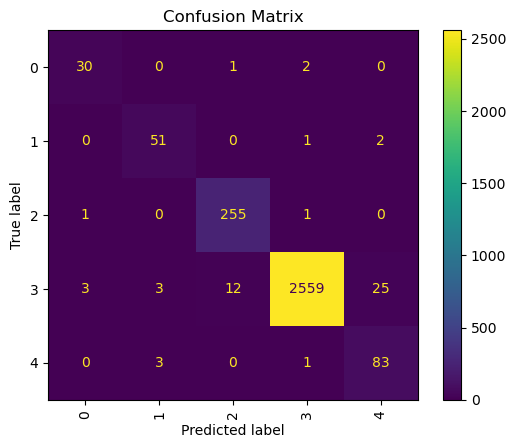

In [69]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

Model looks good, but could be improved!

In [37]:
# Testing up to 100 neightbors to see how the model performs with different values of k.
k_values = range(1, 100)
f1 = []
accuracy_updated = []

# Iterating through the k values and fitting the model to see how it performs with different values of k.
for k in k_values:

    knn_updated = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_updated.fit(X_train_balanced, y_train_balanced)
    y_pred_updated = knn_updated.predict(X_test_scaled)
    f1.append(f1_score(y_test, y_pred_updated, average='weighted'))
    accuracy_updated.append(accuracy_score(y_test, y_pred_updated))

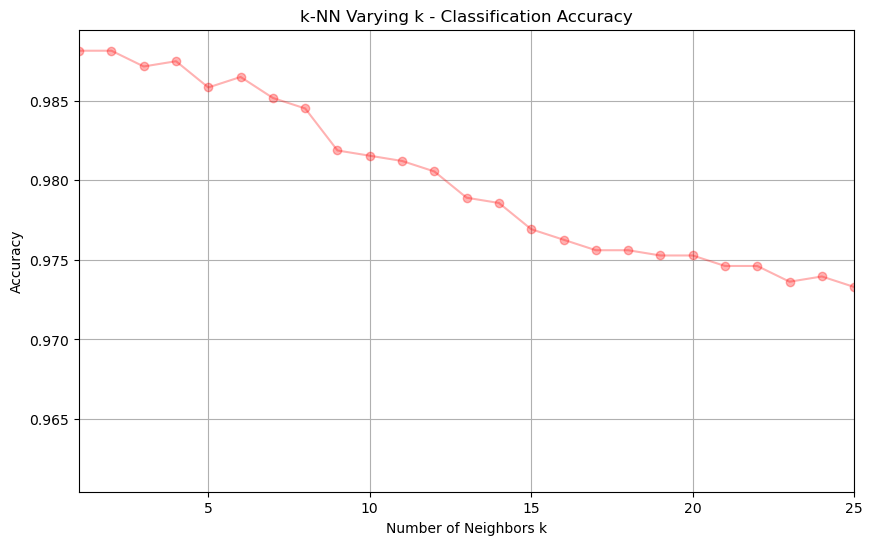

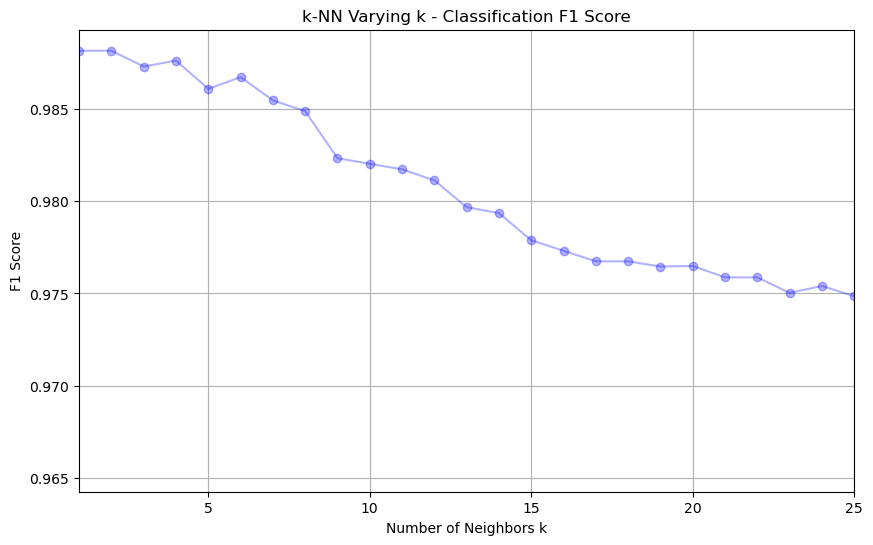

In [38]:
# Lets plot the results to see how the model performs with different values of k.

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_updated, marker='o', linestyle='-', color='r', alpha=0.3)
plt.title('k-NN Varying k - Classification Accuracy')
plt.xlabel('Number of Neighbors k')
plt.xlim(1, 25)
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, f1, marker='o', linestyle='-', color='b', alpha=0.3)
plt.title('k-NN Varying k - Classification F1 Score')
plt.xlabel('Number of Neighbors k')
plt.xlim(1, 25)
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

Looks like 2 neighbors is the best option, but let's double check using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup GridSearch with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_balanced, y_train_balanced)

# Best combo
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best CV score: 0.9980589987508408


<Figure size 1000x1000 with 0 Axes>

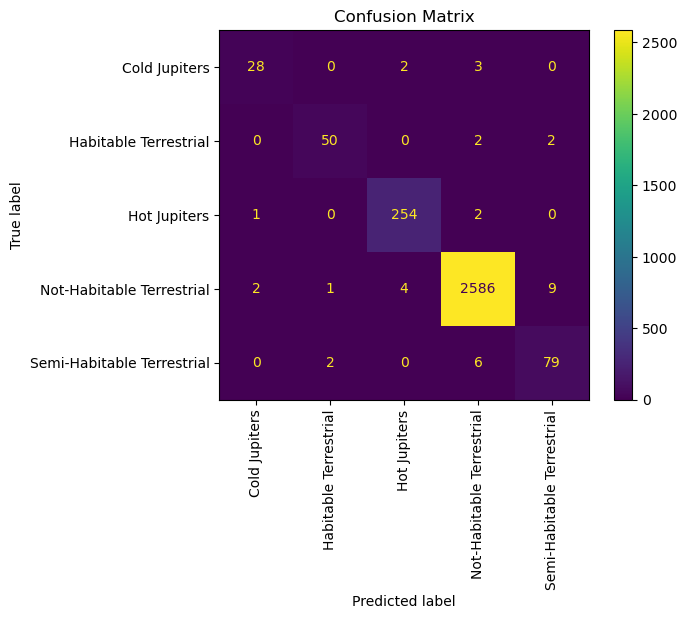

Classification Report:
                            precision    recall  f1-score   support

             Cold Jupiters       0.90      0.85      0.88        33
     Habitable Terrestrial       0.94      0.93      0.93        54
              Hot Jupiters       0.98      0.99      0.98       257
 Not-Habitable Terrestrial       0.99      0.99      0.99      2602
Semi-Habitable Terrestrial       0.88      0.91      0.89        87

                  accuracy                           0.99      3033
                 macro avg       0.94      0.93      0.94      3033
              weighted avg       0.99      0.99      0.99      3033



In [41]:
# Here I am using the best parameters from the grid search to fit the model and make predictions, as well as reverting the labels back to their original form for the confusion matrix
class_labels = label_encoder.inverse_transform(np.unique(y_test))

# Fit the model and make predictions
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='euclidean')
knn.fit(X_train_balanced, y_train_balanced)
y_pred = knn.predict(X_test_scaled)


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

And that is the cleaning, EDA, and KNN Model!

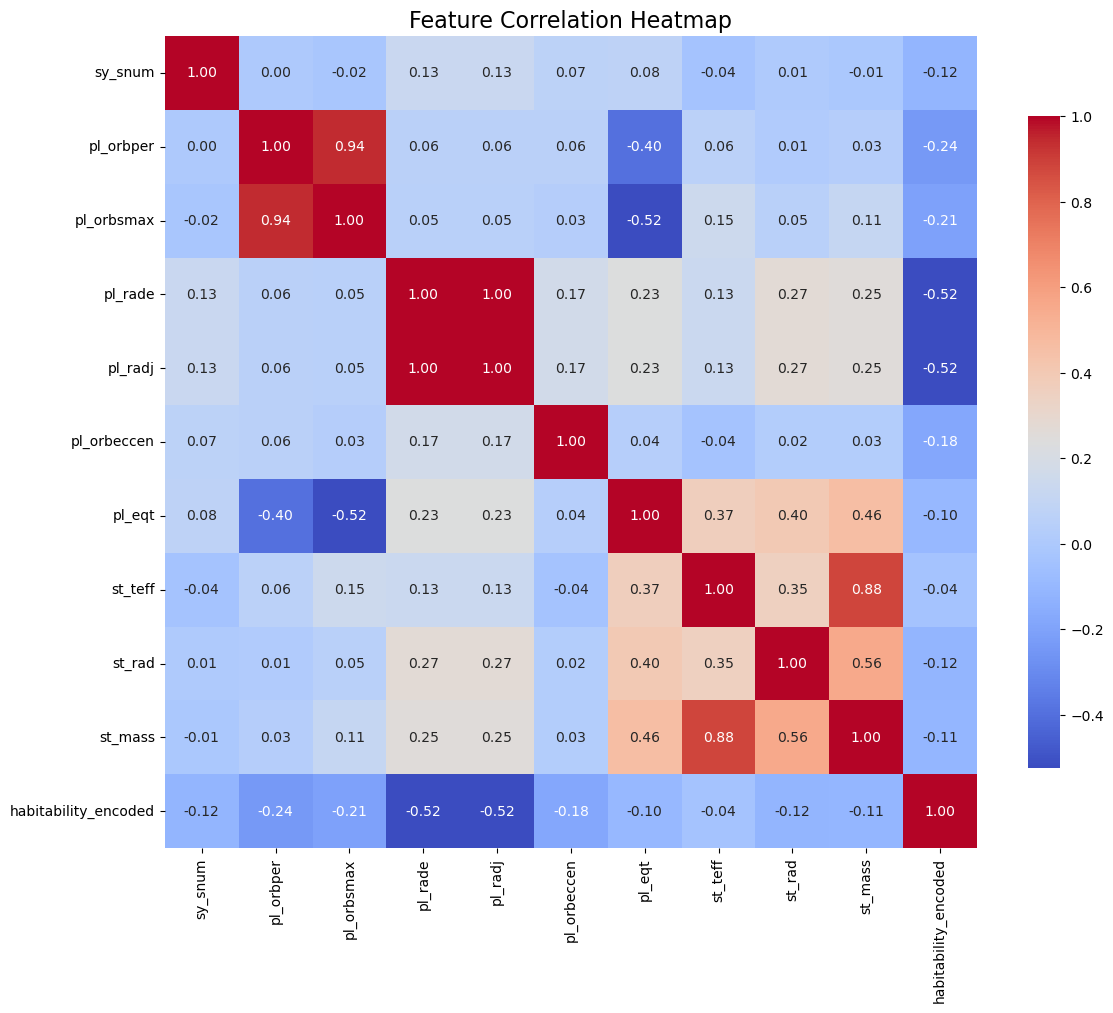